##  Real_conv_Computation_Fig2and3:
### Real-valued input computation complexity comparation
#### The length of sequence h is fixed.  The length of sequence x is varied.
#### Coded by Weiwei Wang(ww20br@fsu.edu). 
#### Supervised by Prof. Victor DeBrunner (victor.debrunner@eng.famu.fsu.edu). 
#### Reviewed by Prof. Linda DeBrunner (linda.debrunner@eng.famu.fsu.edu).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import globals

from myfftpfa import myfftpfa
from numops import numops

# For a bug: jupyter notebook kernel dead
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
#Initialization for test
Lx = np.array([26, 45, 65, 102, 115, 130, 189, 240, 256, 500, 728, 1013, 1150])
Lh = 12
J = 13

In [3]:
N = len(Lx)

RM_ORRVconv = np.zeros(N)
RA_ORRVconv = np.zeros(N)
RM_RVconv = np.zeros(N)
RA_RVconv = np.zeros(N)
RM_DHTconv = np.zeros(N)
RA_DHTconv = np.zeros(N)
RM_FFTconv = np.zeros(N)
RA_FFTconv = np.zeros(N)
RM_BFconv = np.zeros(N)
RA_BFconv = np.zeros(N)

In [4]:
for idx in range(N):

    K = Lh + J - 1
    L = np.ceil(Lx[idx] / J)
    
    # RV-based convolution
    inp = np.random.randint(-127, 128, K)
    myfftpfa(np.c_[inp[:K]])
    RM_ORRVconv[idx] = 2 * L * globals.a[0] + 4 * L * K
    RA_ORRVconv[idx] = 2 * L * globals.a[1] + 2 * L * K
    globals.a = np.array([0, 0])
    
    ops = numops(K, 'r')
    RM_RVconv[idx] = 2 * L * ops[0] + 4 * L * K
    RA_RVconv[idx] = 2 * L * ops[1] + 2 * L * K
    
    # Optimal DHT-based convolution
    K = 2 ** np.ceil(np.log2(K))
    RM_DHTconv[idx] = 2 * L * (2 * K * np.log2(K) - 6 * K + 8) + 4 * L * K
    RA_DHTconv[idx] = 2 * L * (3 * K * np.log2(K) - 3 * K + 4) + 2 * L * K
    
    # FFT-based convolution
    NFFT = 2 ** np.ceil(np.log2(Lx[idx] + Lh - 1))
    RM_FFTconv[idx] = 2 * (2 * NFFT * np.log2(NFFT) - 6 * NFFT + 8) + 4 * NFFT
    RA_FFTconv[idx] = 2 * (3 * NFFT * np.log2(NFFT) - 3 * NFFT + 4) + 2 * NFFT
    
    # Brute force convolution
    if Lh < Lx[idx]:
        RM_BFconv[idx] = Lh ** 2 + Lh * (Lx[idx] - Lh - 1)
        RA_BFconv[idx] = (Lh - 1) ** 2 + (Lh - 1) * (Lx[idx] - Lh - 1)
    else:
        RM_BFconv[idx] = 2 * np.sum(np.arange(1, Lx[idx]+1)) + Lx[idx] * (Lh - Lx[idx] - 1)
        RA_BFconv[idx] = 2 * np.sum(np.arange(1, Lx[idx])) + (Lx[idx] - 1) * (Lh - Lx[idx] - 1)
        

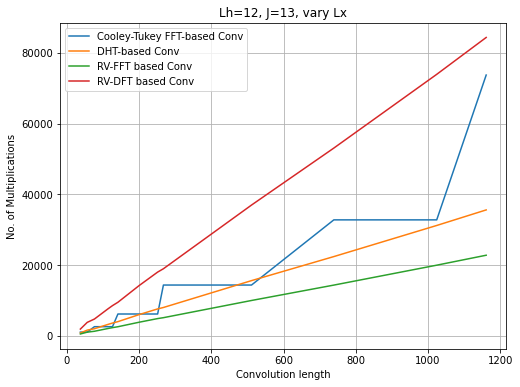

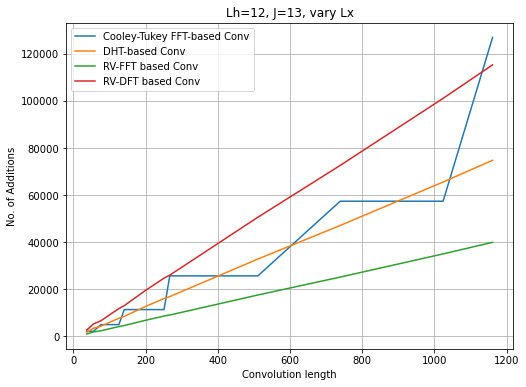

In [5]:
# Display
# The number of multiplications comparison 
plt.figure(figsize=(8, 6))
plt.plot(Lx + Lh - 1, RM_FFTconv, label='Cooley-Tukey FFT-based Conv')
plt.plot(Lx + Lh - 1, RM_DHTconv, label='DHT-based Conv')
plt.plot(Lx + Lh - 1, RM_ORRVconv, label='RV-FFT based Conv')
plt.plot(Lx + Lh - 1, RM_RVconv, label='RV-DFT based Conv')
plt.xlabel('Convolution length')
plt.ylabel('No. of Multiplications')
plt.title('Lh=12, J=13, vary Lx')
plt.legend()
plt.grid(True)
plt.show()

# The number of additions comparison
plt.figure(figsize=(8, 6))
plt.plot(Lx + Lh - 1, RA_FFTconv, label='Cooley-Tukey FFT-based Conv')
plt.plot(Lx + Lh - 1, RA_DHTconv, label='DHT-based Conv')
plt.plot(Lx + Lh - 1, RA_ORRVconv, label='RV-FFT based Conv')
plt.plot(Lx + Lh - 1, RA_RVconv, label='RV-DFT based Conv')
plt.xlabel('Convolution length')
plt.ylabel('No. of Additions')
plt.title('Lh=12, J=13, vary Lx')
plt.legend()
plt.grid(True)
plt.show()
